In [ ]:
import numpy as np
np.set_printoptions(threshold=100)

###Выбираем плотность вероятности, чтобы смоделировать параметр θ, то есть априорное распределение P(θ). Это наше лучшее предположение о параметрах до того, как мы получим данные X.

Чтобы отобразить вероятность, нужно выполнить несколько условий. Во-первых, область определения должна быть между 0 и 1. Во-вторых, распределение должно быть непрерывным.

Чтобы использовать бета-распределение, нужно определить два параметра — α и β. В нашем случае α — количество людей, поставивших лайк (число успешных исходов), а β — количество людей, не поставивших лайк (число неудач). Эти параметры — насколько они велики или малы— определяют форму распределения.
Скажем, у вас есть данные за вчерашний день: из 2,000 посетителей лайк поставили 400. Как записать это в терминах бета-распределения?

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
a = 400
b = 2000 - a
# область определения θ
theta_range = np.linspace(0, 1, 1000)
# априорное распределение P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

Probability Density Function - функция плотности вероятности

pdf Значение плотности в точке (Probability Density Function)


In [ ]:
theta_range[0:25]

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402])

In [ ]:
prior[0:25]

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.49687635e-314, 2.66159443e-303,
       7.98941937e-293, 5.02291381e-283, 7.90750475e-274, 3.62033649e-265,
       5.47091022e-257, 3.04014662e-249, 6.81748450e-242, 6.68701265e-235,
       3.07774808e-228])

In [ ]:
len(prior)

1000

Давайте начертим априорное распределение по всем значениям θ.

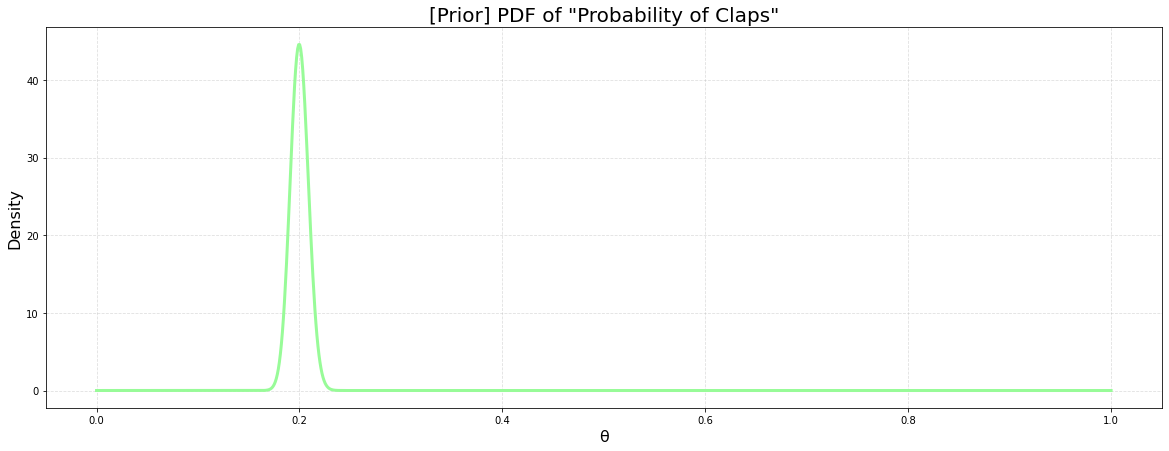

In [ ]:
# Строим априорное распределение
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')
# Добавляем заголовок
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)
# Добавляем метки X и y
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16) # Плотность
# Добавляем разметку
plt.grid(alpha=.4, linestyle='--')
# Рисуем чертеж
plt.show()

Давайте сгенерируем данные X. (В реальной жизни вы никак не контролируете X, только наблюдаете.)

In [ ]:
# Генерируем 2,000 читательских ответов. 
# Предполагаем, что количество лайков следует процессу Бернулли - последовательности двоичных (успех или неудача) случайных переменных.
# 1 означает лайк, 0 - отсутствие лайка
# Устанавливаем уровень успеха в 30%.
clap_prob = 0.3
# IID (независимое и равномерно распределенное) условие
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)

In [ ]:
clap_data

array([0, 0, 1, ..., 1, 0, 0])

У нас также есть общее количество посетителей (n) и количество лайков, следовательно, вероятность лайков (p) от X.

Хорошо, n и p… Очевидно это..?
Биномиальное распределение с n и p для прогнозирования количества лайков.

probability mass function

In [ ]:
# Выборочное распределение P(X|θ) с заданной clap_prob(θ)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = clap_prob)

Вероятность увидеть такую выборка

In [ ]:
likelihood

0.016482082165370674

In [ ]:
clap_prob

0.3

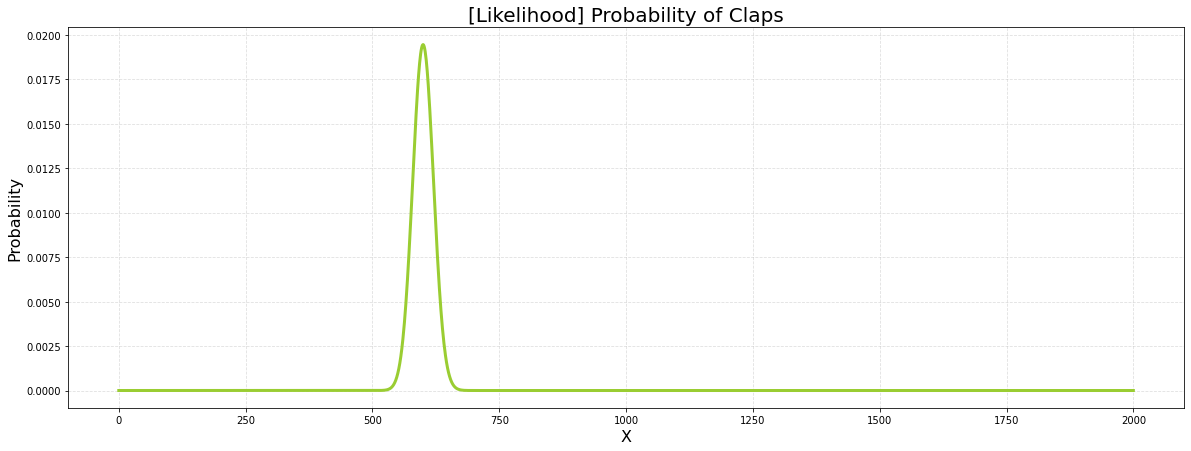

In [ ]:
# Область определения (количество лайков)
X = np.arange(0, len(clap_data)+1)
# Правдоподобие P(X|θ) для всех X
likelihood = stats.binom.pmf(k = X, n = len(clap_data), p = clap_prob)
# Чертим график
fig, ax = plt.subplots()
plt.plot(X, likelihood, linewidth=3, color='yellowgreen')
# Добавляем заголовок
plt.title('[Likelihood] Probability of Claps' , fontsize=20)
# Добавляем метки X и y
plt.xlabel('X', fontsize=16)
plt.ylabel('Probability', fontsize=16)
# Добавляем разметку
plt.grid(alpha=.4, linestyle='--')
# Отображаем чертеж
plt.show()

Это вероятность увидеть X успешных исходов в n попыток при условии, что θ = 30%.

Весь смысл байесовского вывода заключается в том, чтобы найти наиболее соответствующую данным θ

Наше начальное предположение о параметрах было P(θ). По мере поступления новых данных мы превращаем простую P(θ) в нечто более информативное — P(θ|X).
P(θ|X) — все еще вероятность θ, такая же как P(θ). Однако P(θ|X) “умнее” P(θ).

Как перемножить вероятность относительно X и вероятность относительно θ?

Тоесть у нас есть вероятность увидеть такое Х и вероятность что θ выбран правильно

Вычисляем P(θ) и P(X|θ) для заданного значения θ и перемножаем их. Если сделать это для каждой возможной θ, мы сможем выбрать наибольшее P(θ) * P(X|θ) среди различных θ.
Мы можем умножить P(θ) на P(X|θ) по условию θ.

Cumulative distribution function - функция распределения

pdf - функция плотности вероятности

pmd - вероятность увидеть такую выборку

мы вычислили априорную вероятность, вычитая два stats.beta.cdf вместо использования stats.beta.pdf, потому что вероятность stats.binom.pmf— это именно вероятность, а stats.beta.pdf возвращает плотность вероятности. Даже если мы используем плотность вероятности для вычисления апостериорной вероятности, результат оптимизации не изменится. Однако, чтобы они соответствовали друг другу, необходимо преобразовать плотность в вероятность.

In [ ]:
theta_range

array([0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ])

In [ ]:
# (cont.)
theta_range_e = theta_range + 0.001
# prior Вероятность которую мы предполагаем для разных тетта
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
# likelihood Вероятность получить на выборке длинной len(clap_data) количество значений np.sum(clap_data) с разными тетта 
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 
posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)

In [ ]:
b

1600

In [ ]:
normalized_posterior

array([0., 0., 0., ..., 0., 0., 0.])

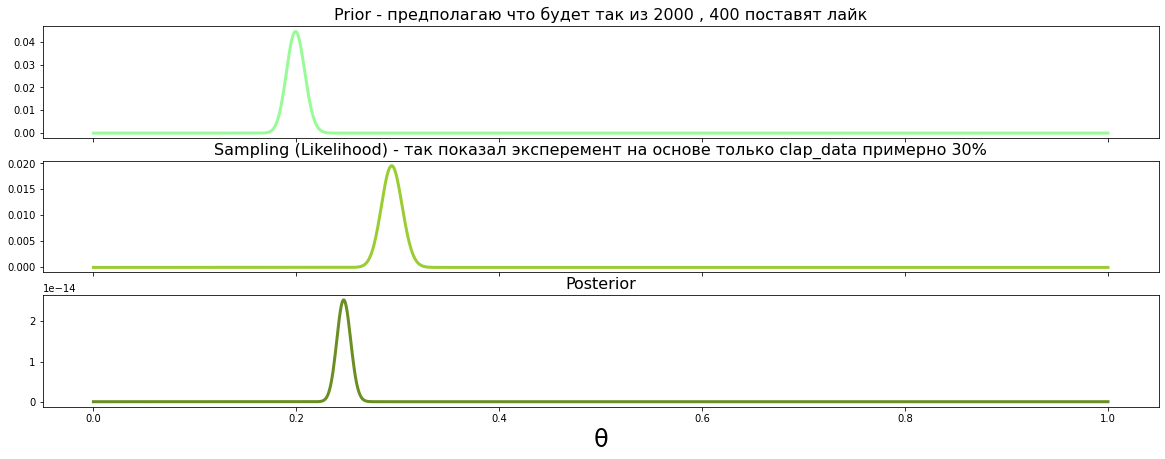

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior - предполагаю что будет так из 2000 , 400 поставят лайк", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood) - так показал эксперемент на основе только clap_data примерно 30%", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior - это то что мы ожидаем дальше', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

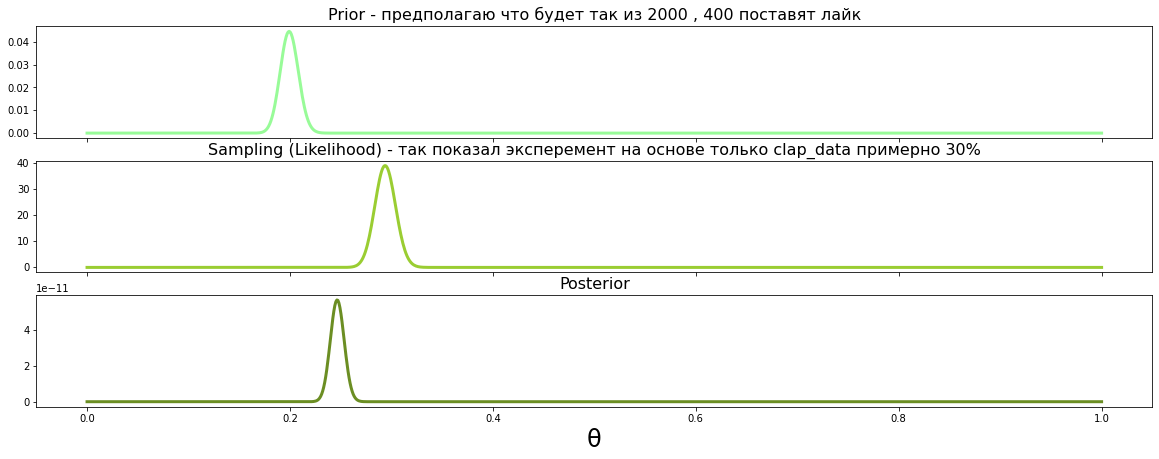

In [ ]:
# (cont.)
theta_range_e = theta_range + 0.001
# prior Вероятность которую мы предполагаем для разных тетта
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
# likelihood Вероятность получить на выборке длинной len(clap_data) количество значений np.sum(clap_data) с разными тетта 
# likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range)
likelihood = stats.beta.pdf(x = theta_range, a=np.sum(clap_data), b=len(clap_data)-np.sum(clap_data))  
posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior - предполагаю что будет так из 2000 , 400 поставят лайк", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood) - так показал эксперемент на основе только clap_data примерно 30%", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior - это то что мы ожидаем дальше', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

In [ ]:
likelihood[200:300]

array([4.59192926e-24, 1.47119316e-23, 4.63511372e-23, 1.43624089e-22,
       4.37753328e-22, 1.31257786e-21, 3.87232159e-21, 1.12415159e-20,
       3.21174461e-20, 9.03180356e-20, 2.50022551e-19, 6.81409459e-19,
       1.82857873e-18, 4.83222533e-18, 1.25764886e-17, 3.22403901e-17,
       8.14177413e-17, 2.02564889e-16, 4.96573366e-16, 1.19956524e-15,
       2.85582706e-15, 6.70120994e-15, 1.55000419e-14, 3.53439624e-14,
       7.94591778e-14, 1.76141821e-13, 3.85046322e-13, 8.30113451e-13,
       1.76513201e-12, 3.70231108e-12, 7.66063421e-12, 1.56383961e-11,
       3.14988254e-11, 6.26050883e-11, 1.22793659e-10, 2.37700816e-10,
       4.54161888e-10, 8.56549238e-10, 1.59474576e-09, 2.93132118e-09,
       5.31989473e-09, 9.53333236e-09, 1.68702842e-08, 2.94828506e-08,
       5.08884163e-08, 8.67567595e-08, 1.46101515e-07, 2.43055123e-07,
       3.99470509e-07, 6.48672294e-07, 1.04077545e-06, 1.65009810e-06,
       2.58531276e-06, 4.00309771e-06, 6.12615302e-06, 9.26651501e-06,
      

In [ ]:
prior[200:300]

array([4.43182289e-02, 4.34992796e-02, 4.21723060e-02, 4.03884733e-02,
       3.82129784e-02, 3.57211682e-02, 3.29943119e-02, 3.01153497e-02,
       2.71649141e-02, 2.42178708e-02, 2.13405607e-02, 1.85888465e-02,
       1.60069934e-02, 1.36273446e-02, 1.14706961e-02, 9.54723876e-03,
       7.85791221e-03, 6.39601331e-03, 5.14890974e-03, 4.09973130e-03,
       3.22893795e-03, 2.51569354e-03, 1.93900349e-03, 1.47860072e-03,
       1.11558565e-03, 8.32841576e-04, 6.15257212e-04, 4.49793137e-04,
       3.25429773e-04, 2.33032365e-04, 1.65164028e-04, 1.15872486e-04,
       8.04703376e-05, 5.53231094e-05, 3.76544977e-05, 2.53740945e-05,
       1.69297759e-05, 1.11846402e-05, 7.31687834e-06, 4.74007449e-06,
       3.04104046e-06, 1.93222982e-06, 1.21595203e-06, 7.57907839e-07,
       4.67928557e-07, 2.86171573e-07, 1.73371421e-07, 1.04052519e-07,
       6.18687666e-08, 3.64463043e-08, 2.12724660e-08, 1.23022155e-08,
       7.04966585e-09, 4.00305677e-09, 2.25253216e-09, 1.25609956e-09,
      

In [ ]:
posterior[200:300]

array([2.03506172e-25, 6.39958427e-25, 1.95473434e-24, 5.80075767e-24,
       1.67278585e-23, 4.68868146e-23, 1.27764586e-22, 3.38542184e-22,
       8.72467666e-22, 2.18731052e-21, 5.33562144e-21, 1.26666158e-20,
       2.92700478e-20, 6.58503999e-20, 1.44261079e-19, 3.07806702e-19,
       6.39773464e-19, 1.29560773e-18, 2.55681144e-18, 4.91789516e-18,
       9.22128838e-18, 1.68581906e-17, 3.00546353e-17, 5.22596084e-17,
       8.86435188e-17, 1.46698232e-16, 2.36902526e-16, 3.73379333e-16,
       5.74426511e-16, 8.62758309e-16, 1.26526120e-15, 1.81205984e-15,
       2.53472111e-15, 3.46350814e-15, 4.62373356e-15, 6.03144297e-15,
       7.68885897e-15, 9.58019506e-15, 1.16685607e-14, 1.38946807e-14,
       1.61780151e-14, 1.84205890e-14, 2.05134563e-14, 2.23452836e-14,
       2.38121432e-14, 2.48273183e-14, 2.53298273e-14, 2.52904979e-14,
       2.47147477e-14, 2.36417078e-14, 2.21398603e-14, 2.02998623e-14,
       1.82255911e-14, 1.60246274e-14, 1.37993567e-14, 1.16396654e-14,
      

Биноминальное - если у меня есть вероятность 0.3 и количество испытаний 2000, какова вероятность что положительных исходов будет 700

Бета - если у меня есть количество испытаний 2000 и количество исходов 700 какова вероятность что вероятность этого распределения будет 0.3